### Análisis de datos exploratorios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
#import geopandas as gpd
plt.style.use('seaborn')

In [2]:
print(sys.version)
print(pd.__name__, pd.__version__)
#print(gpd.__name__, gpd.__version__)
print(np.__name__, np.__version__)
print(plt.matplotlib.__name__, plt.matplotlib.__version__)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
pandas 1.2.4
numpy 1.20.1
matplotlib 3.3.4


In [3]:
df = pd.read_csv('../DataBase/database_Earthquakes.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
print('The information of the database is: \n', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [5]:
col_list =  df.columns.tolist()
print('The names of column is: \n', col_list)
print('\n')
print('The shape of database is: \n Rows:      {} \n Columns:   {}'.format(df.shape[0], df.shape[1]))
print('\n')
print('The type of each column is: \n', df.dtypes)

The names of column is: 
 ['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


The shape of database is: 
 Rows:      23412 
 Columns:   21


The type of each column is: 
 Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error      

In [6]:
print('Empty values in the dataframe')
df.isna().sum()

Empty values in the dataframe


Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [7]:
print('The type of source and quantity: \n')
types = df['Type'].value_counts()
print(types)

The type of source and quantity: 

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64


The type of magnitud is: 

MW     7722
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: Magnitude Type, dtype: int64


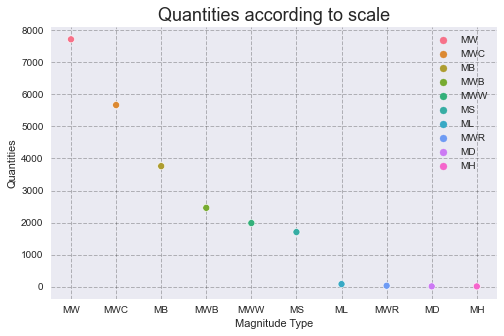

In [8]:
print('The type of magnitud is: \n')
MT = df['Magnitude Type'].value_counts()
print(MT)
plt.figure(figsize=(8,5))
sns.scatterplot(x=MT.index, y=list(MT), hue=MT.index)
plt.title('Quantities according to scale', fontsize=18)
plt.xlabel('Magnitude Type')
plt.ylabel('Quantities')
plt.grid(b=True, linestyle='--', alpha=0.25, color='k')
plt.show()

Magnitude distribution and statistics: 

count    23412.000000
mean         5.882531
std          0.423066
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64


The mode is: 
0    5.5
dtype: float64


[]

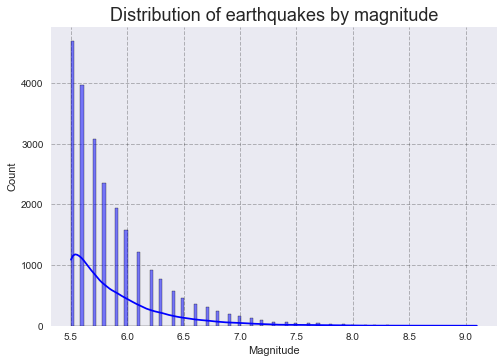

In [9]:
print('Magnitude distribution and statistics: \n')
mag = df['Magnitude']
print(mag.describe())
print('\n')
print('The mode is: ')
print(mag.mode())

sns.histplot(mag, kde=True, color='Blue', cbar=True)
plt.grid(b=True, linestyle='--', alpha=0.25, color='k')
plt.title('Distribution of earthquakes by magnitude', fontsize=18)
plt.plot()

Deepth distribution and statistics: 

count    23412.000000
mean        70.767911
std        122.651898
min         -1.100000
25%         14.522500
50%         33.000000
75%         54.000000
max        700.000000
Name: Depth, dtype: float64


The mode is: 
0    10.0
dtype: float64


[]

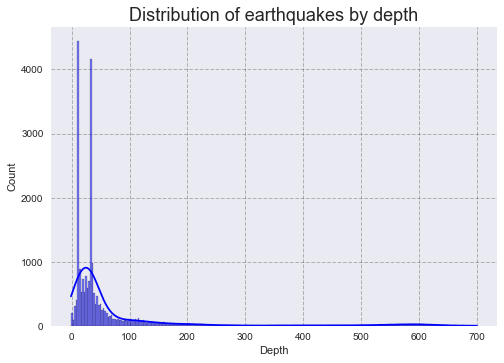

In [10]:
print('Deepth distribution and statistics: \n')
dep = df['Depth']
print(dep.describe())
print('\n')
print('The mode is: ')
print(dep.mode())

sns.histplot(dep, kde=True, color='Blue', cbar=True)
plt.grid(b=True, linestyle='--', alpha=0.25, color='k')
plt.title('Distribution of earthquakes by depth', fontsize=18)
plt.plot()

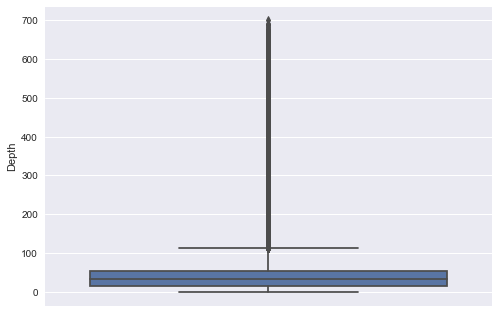

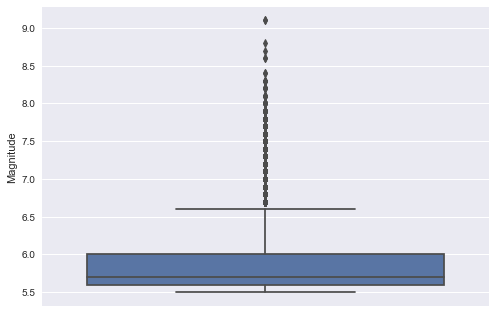

In [15]:
col = ['Depth', 'Magnitude']
sns.boxplot(y=df['Depth'], data=df)
plt.show()
sns.boxplot(y=df['Magnitude'], data=df)
plt.show()

<AxesSubplot:xlabel='Depth', ylabel='Magnitude'>

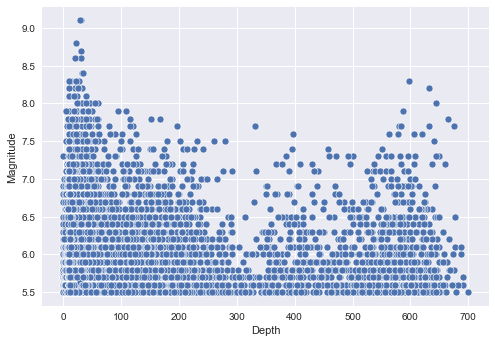

In [12]:
sns.scatterplot(x='Depth',y='Magnitude',data=df)

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

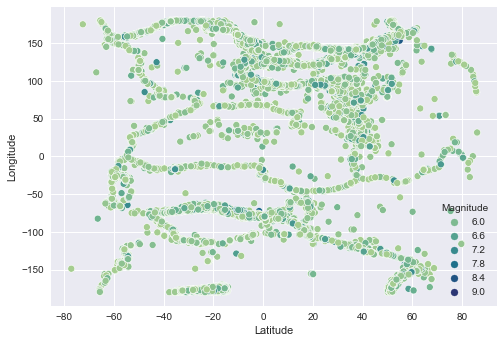

In [32]:
sns.color_palette("mako", as_cmap=True)
sns.scatterplot(x='Latitude', y='Longitude', data=df, hue='Magnitude', palette='crest')